## Install required libs, repos and MMDet toolbox
Restart the runtime after this step (to import mmdet)

In [ ]:
import os
from os.path import exists, join, basename, splitext

# Dependencies for CascadeTabNet:
# libs stored on GDrive
%cd /content/drive/My Drive/colab_env
!pip install torch-1.4.0+cu100-cp36-cp36m-linux_x86_64.whl
!pip install torchvision-0.5.0+cu100-cp36-cp36m-linux_x86_64.whl
!pip install -q mmcv==0.4.3 terminaltables

# Fork of author's repo:
git_repo_url = 'https://github.com/br-eina/mmdetection_object_detection_demo'

# Define mmdetection dir:
%cd /content
project_name = os.path.abspath(splitext(basename(git_repo_url))[0])
mmdetection_dir = os.path.join(project_name, "mmdetection")

# Install mmdetection:
if not exists(project_name):
    # Clone "depth 1" will only get the last commits for every branch:
    !git clone -q --recurse-submodules --depth 1 --no-single-branch $git_repo_url
    # Update mmdetection repo:
    !cd {mmdetection_dir} && git checkout v1.2.0 && git pull
    # Build mmdetection:
    !cd {mmdetection_dir} && python setup.py install
    !pip install -r {os.path.join(mmdetection_dir, "requirements.txt")}

Streaming output truncated to the last 5000 lines.
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader_options.h:4,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/base.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/stateful.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/all.h:4,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/extension.h:4,
                 from mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:1:
/usr/local/lib/python3.6/dist-

## Train a model

In [ ]:
%cd '/content'
%xmode Verbose
config_path = '/content/mmdetection_object_detection_demo/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
!python /content/mmdetection_object_detection_demo/mmdetection/tools/train.py {config_path}

/content
Exception reporting mode: Verbose
2020-09-24 09:47:10,885 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.6.9 (default, Jul 17 2020, 12:50:27) [GCC 8.4.0]
CUDA available: True
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 10.1, V10.1.243
GPU 0: Tesla P100-PCIE-16GB
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.4.0+cu100
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CUDA Runtime 10.0
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=co

In [ ]:
%cd /content

# log_file = '/content/drive/My Drive/colab_env/tab_net_finetuning/type_all/workdir/20200923_121722.log.json'
log_file = '/content/drive/My Drive/colab_env/tab_net_finetuning/type_all/workdir/20200924_094710.log.json'
pdf_file = '/content/drive/My Drive/colab_env/tab_net_finetuning/type_all/workdir/losses.pdf'
!python /content/mmdetection_object_detection_demo/mmdetection/tools/analyze_logs.py plot_curve log.json --keys s0.loss_bbox --out s0_loss_bbox.pdf

/content
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
plot curve of log.json, metric is s0.loss_bbox
save curve to: s0_loss_bbox.pdf


## Predict tables for a specific image:

In [ ]:
%cd /content/drive/My Drive/colab_env
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import json

# Load model:
gen_dir = '/content/drive/My Drive/colab_env/tab_net_finetuning/'
list_dir = gen_dir + 'type_all/'
config_file = '/content/mmdetection_object_detection_demo/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
# checkpoint_file = list_dir + 'workdir/epoch_42.pth'
checkpoint_file = gen_dir + 'epoch_1_ICDAR13.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Load train, test, unseen imagenames:
images_folder = gen_dir + 'images/'
train_list_path = list_dir + 'train_list.json'
test_list_path = list_dir + 'test_list.json'
unseen_list_path = list_dir + 'unseen_list.json'

with open(train_list_path, 'r+') as f:
    train_list = json.load(f)
with open(test_list_path, 'r+') as f:
    test_list = json.load(f)
with open(unseen_list_path, 'r+') as f:
    unseen_list = json.load(f)

/content/drive/My Drive/colab_env


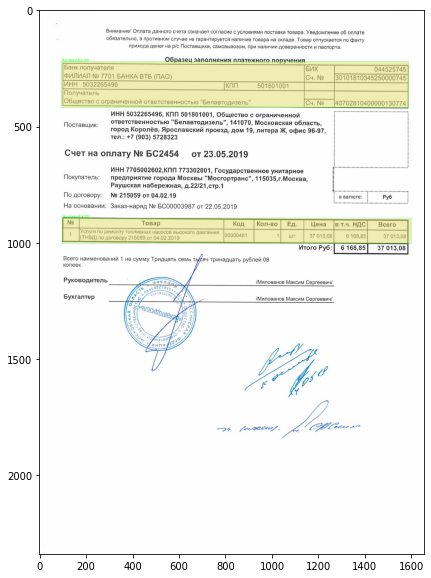

In [ ]:
image_path = images_folder + unseen_list[43]

# Run Inference:
result = inference_detector(model, image_path)
# Visualization results:
show_result_pyplot(image_path, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

In [ ]:
result[0][:3]

[array([[8.51222229e+01, 4.58633240e+02, 2.24336646e+03, 1.00655975e+03,
         9.99993682e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32)]

## Save predictions to JSON 

Select a pre-trained model (ICDAR13, ICDAR19, etc.)

That model was trained on certain part of custom dataset. 

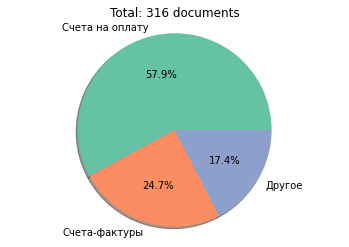

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')

# Construct dataframe with filenames and image_types:
gen_dir = '/content/drive/My Drive/colab_env/tab_net_finetuning/'
annotation_path = gen_dir + 'ann_vgg_json.json'
with open(annotation_path, 'r+') as f:
    ann_json = json.load(f)

df_data = []
for key in ann_json:
    ann_image = ann_json[key]
    df_series = dict()
    df_series['filename'] = ann_image['filename']
    df_series['img_type'] = ann_image['file_attributes']['img_type']
    df_data.append(df_series)
df = pd.DataFrame(df_data)

# Pie chart of document types:
labels = ['Счета на оплату', 'Счета-фактуры', 'Другое']
sizes = [df['img_type'].value_counts()[0],
         df['img_type'].value_counts()[1],
         df['img_type'].value_counts()[2],]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set_title(f'Total: {df.shape[0]} documents')
plt.show()

3 types of training:
- all 3 types (type_all);
- opl + fact (type_opl_fact);
- opl (type_opl)

There are corresponding train / test / unseeen lists for each type of training. Select one of them. 

Each model was trained during 8 epoches. For every epoch we evaluate the results on train / test / unseen images.


-----------------------------------------------

In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
from tqdm.notebook import tqdm
import json

# Define paths for images and train/test/unseen lists
gen_dir = '/content/drive/My Drive/colab_env/tab_net_finetuning/'
list_dir = gen_dir + 'type_all/'
images_folder = gen_dir + 'images/'
train_list_path = list_dir + 'train_list.json'
test_list_path = list_dir + 'test_list.json'
unseen_list_path = list_dir + 'unseen_list.json'

# Load train, test, unseen imagenames:
with open(train_list_path, 'r+') as f:
    train_list = json.load(f)
with open(test_list_path, 'r+') as f:
    test_list = json.load(f)
with open(unseen_list_path, 'r+') as f:
    unseen_list = json.load(f)

Create a JSON with results for a model:
1. which was pretrained on a spefic dataset (icdar13/19...)
2. which was trained on a part of custom dataset (type_all, type_2, ...)

*Data structure:*
```
{
 'dataset_type': 'type_all / ...',
 'results': [
             {
              'epoch': X,
              'results_train': [
                                {
                                 'image_name': 'imgname',
                                 'tables_bordered' : [
                                                      {
                                                       'bbox': [x1, y1, x2, y2],
                                                       'conf': confidence
                                                      }, ...
                                                     ],
                                 'cells': [ ... ],
                                 'tables_borderless': [ ... ]
                                }, ....           
                               ]
              'results_test': [ ... ],
              'results_unseen': [ ... ]
             }
            ]
}
```


In [ ]:
icdar19_type_all = dict()
icdar19_type_all["dataset_type"] = "type_all"
icdar19_type_all["results"] = []

epoches = [36, 37, 38, 39, 40, 41, 42]

for epoch_num in epoches:
    # Load model for epoch:
    if epoch_num == 36:
        checkpoint_file = gen_dir + 'epoch_36_ICDAR19.pth'
    else:
        checkpoint_file = list_dir + f'workdir/epoch_{str(epoch_num)}.pth'
    model = init_detector(config_file, checkpoint_file, device='cuda:0')
    # Define dict structure for results on epoch:
    epoch_x = dict()
    epoch_x["epoch"] = epoch_num
    epoch_x["results_train"] = []
    epoch_x["results_test"] = []
    epoch_x["results_unseen"] = []

    print(f'\nEpoch {epoch_num}: initiate processing: \n')

    lists_eval = {
        "train_list": train_list,
        "test_list": test_list,
        "unseen_list": unseen_list
    }

    for list_name in lists_eval:
        current_list = lists_eval[list_name]
        print(f'Processing {len(current_list)} images in {list_name}:')
        pbar = tqdm(current_list)
        for ind, image_name in enumerate(pbar):
            pbar.set_description(f'Image #{ind+1}: {image_name}')
            image_path = images_folder + image_name
            inf_result = inference_detector(model, image_path)
            # Define dict structure for image results
            image_results = dict()
            image_results["image_name"] = image_name
            image_results["tables_bordered"] = []
            image_results["cells"] = []
            image_results["tables_borderless"] = []           

            det_objects = {
                "tables_bordered": inf_result[0][0],
                "cells": inf_result[0][1],
                "tables_borderless": inf_result[0][2]
            }
            # For every type of object (tables/cell):
            for object_type in det_objects:
                current_objects = det_objects[object_type]
                if current_objects.any():
                    # Add object (table/cell) info to image results
                    for obj in current_objects:
                        x1, y1, x2, y2, conf = [round(val, 3) for val in obj.tolist()]
                        obj_info = dict()
                        obj_info["bbox"] = [x1, y1, x2, y2]
                        obj_info["conf"] = conf
                        image_results[object_type].append(obj_info)
            # Add image results to corresponding list (results_train/test/unseen)
            epoch_x[f"results_{list_name.split('_')[0]}"].append(image_results)

    icdar19_type_all["results"].append(epoch_x)


Epoch 36: initiate processing: 

Processing 201 images in train_list:



Processing 51 images in test_list:



Processing 64 images in unseen_list:




Epoch 37: initiate processing: 

Processing 201 images in train_list:



Processing 51 images in test_list:



Processing 64 images in unseen_list:




Epoch 38: initiate processing: 

Processing 201 images in train_list:



Processing 51 images in test_list:



Processing 64 images in unseen_list:




Epoch 39: initiate processing: 

Processing 201 images in train_list:



Processing 51 images in test_list:



Processing 64 images in unseen_list:




Epoch 40: initiate processing: 

Processing 201 images in train_list:



Processing 51 images in test_list:



Processing 64 images in unseen_list:




Epoch 41: initiate processing: 

Processing 201 images in train_list:



Processing 51 images in test_list:



Processing 64 images in unseen_list:




Epoch 42: initiate processing: 

Processing 201 images in train_list:



Processing 51 images in test_list:



Processing 64 images in unseen_list:


In [ ]:
results_json_path = list_dir + 'icdar19_type_all_results.json'
with open(results_json_path, 'w+') as f:
    json.dump(icdar19_type_all, f, indent=4)

----------------------------------------------------------------------

In [ ]:
for table_bbox in result[0][0]:
    print(table_bbox)

[5.7001457e+01 5.8826428e+02 2.3068550e+03 1.0529600e+03 9.9898392e-01]


In [ ]:
if result[0][1].any():
    print(True)
else:
    print(False)

False


In [ ]:
result[0][0][0]

array([5.7001457e+01, 5.8826428e+02, 2.3068550e+03, 1.0529600e+03,
       9.9898392e-01], dtype=float32)

In [ ]:
x = None
if x:
    print(True)
else:
    print(False)

False


In [ ]:
x1, y1, x2, y2, conf = result[0][0][0]
x1, y1, x2, y2, conf

(57.001457, 588.2643, 2306.855, 1052.96, 0.9989839)

In [ ]:
import numpy as np

arr = np.array([57.335235, 588.221424, 2306.42112, 1052.71212, 0.9942241], dtype=np.float32)

list_arr = arr.tolist()
list_arr

[57.335235595703125,
 588.221435546875,
 2306.421142578125,
 1052.712158203125,
 0.9942240715026855]

In [ ]:
x1, y1, x2, y2, conf = [round(val, 3) for val in list_arr]
x1, y1, x2, y2, conf

(57.335, 588.221, 2306.421, 1052.712, 0.994)

In [ ]:
x1, y1, x2, y2, conf = [round(val, 3) for val in arr]
x1, y1, x2, y2, conf

(57.335, 588.221, 2306.421, 1052.712, 0.994)

In [ ]:
type(x1)

numpy.float32

In [ ]:
x1, y1, x2, y2, conf = [round(val, 3) for val in arr.tolist()]
x1, y1, x2, y2, conf

(57.335, 588.221, 2306.421, 1052.712, 0.994)

In [ ]:
type(x1)

float

In [ ]:
a = "train_list"
a.split('_')[0]

'train'